In [35]:
import networkx as nx
import pandas as pd
import os
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import random

In [42]:
nodes100 = []
for i in range(100):
    nodes100.append(i)
edges = []
m = random.randint(1, 100) #number of edges- maybe equal n*(n-1)*0.5?
for i in range(m):
    node1 = random.randint(1, 100)
    node2 = random.randint(1, 100)
    tail = min(node1, node2)
    head = max(node1, node2)
    cap = 10000 # change
    if tail != head and (int(tail), int(head), int(cap)) not in edges:
        edges.append((int(tail), int(head), int(cap)))

In [43]:
# generate graph
G = nx.Graph() #undirected graph since all edges are bidirectional and have shared capacity
G.add_weighted_edges_from(edges)

{(64, 99): Text(0.18030136933979096, -0.4166518811525513, '10000'),
 (99, 69): Text(0.31495108787179693, -0.49628350270878235, '10000'),
 (36, 88): Text(0.045772318836361126, 0.042983068423550486, '10000'),
 (36, 21): Text(-0.19436705129191745, 0.8695482019522102, '10000'),
 (88, 51): Text(-0.13452905050342984, -0.3736688127290008, '10000'),
 (46, 49): Text(-0.9833049447784513, 0.15574020334708397, '10000'),
 (49, 30): Text(-0.6535218614016096, 0.5069235179122333, '10000'),
 (49, 13): Text(-0.15673981124979142, 0.39587957347536235, '10000'),
 (4, 31): Text(0.3002293042219766, 0.5892331865265531, '10000'),
 (13, 70): Text(0.18776505577687058, -0.11104394443687099, '10000'),
 (13, 63): Text(5.551115123125783e-17, 0.0, '10000'),
 (70, 83): Text(0.08636833986338407, -0.9136815981695084, '10000'),
 (71, 79): Text(2.636779683484747e-16, -0.9685831611286311, '10000'),
 (71, 67): Text(-0.36522178063328486, -0.9224449205862474, '10000'),
 (79, 9): Text(0.546508906333435, -0.2163781830748172, '1

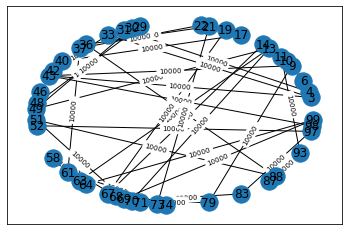

In [44]:
# VISUALIZATION
angles = np.linspace(0, 2*np.pi, 101)[:-1]
coords = [[np.cos(angles[i]), np.sin(angles[i])] for i in range(len(angles))]
pos = {}
for i in range(100):
    pos[i] = coords[i]

nx.draw_networkx(G,pos)
capacities = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=capacities, font_size=7)